**PRCP-1013-WalkRunClass**

**Problem Statement**

##### Task 1:-Prepare a complete data analysis report on the given data.
##### Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.

**Dataset Overview**

The dataset comprises the readings of motion sensors recorded while users executed typical daily activities. The detailed format is described in the package. The attributes
correspond to raw sensor readings. There are a total of 11 attributes.
1. date
2. time
3. username
4. wrist
5. activity
6. acceleration_x
7. acceleration_y
8. acceleration_z
9. gyro_x
10. gyro_y
11. gyro_z

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/walkrun.csv')
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


**Task 1: Data Analysis**

## EDA

In [ ]:
df.shape


(88588, 11)

In [ ]:
df['activity'].unique()

array([0, 1])

In [ ]:
df.isnull().sum()

,0
date,0
time,0
username,0
wrist,0
activity,0
acceleration_x,0
acceleration_y,0
acceleration_z,0
gyro_x,0
gyro_y,0


In [ ]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [ ]:
df.wrist.unique()

array([0, 1])

To understand the relationship between accelerometer data and activity type (walking vs. running), we can plot acceleration_x, acceleration_y, and acceleration_z over time, color-coded by the activity column (0 for walking, 1 for running).
1. In the **acceleration_x** plots, running (activity = 1) typically exhibits sharp peaks and greater variability, reflecting the intense, rapid movements characteristic of running. Walking (activity = 0), by contrast, shows smoother, more stable lines with lower peak values, consistent with its steadier motion. Notably, as time progresses, the line representing running activity begins to decrease, while the line for walking activity rises. This shift over time suggests a transition in the data from periods of running to periods of walking, capturing the natural variations in the subject’s movement patterns.
2. In the **acceleration_y** plot, walking shows very stable and low movement, while running displays high and varied movement. This contrast highlights the steadiness of walking versus the intensity of running.

3. The graph of **acceleration_z** shows distinct patterns based on activity: walking displays increasing motion, while running shows a decreasing trend. However, as the date progresses, there’s an abrupt drop in the walking data and a sudden spike in the running data, indicating a significant shift in activity patterns over time.

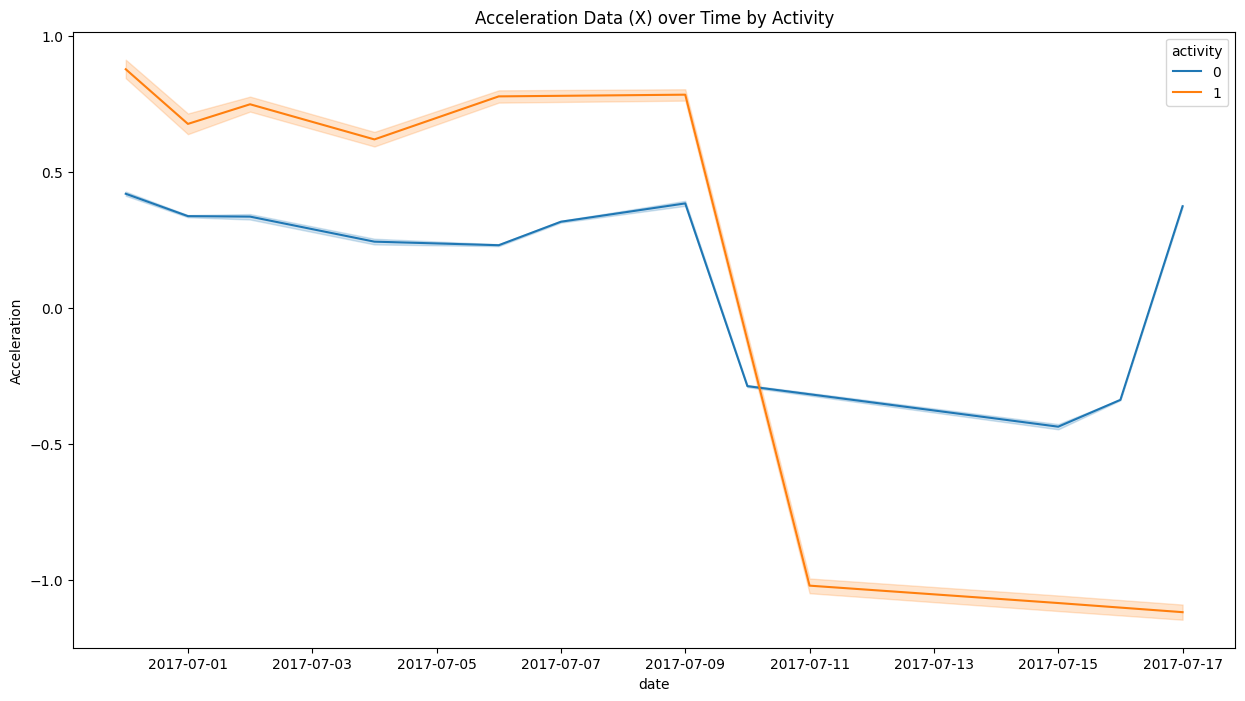

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x='date', y='acceleration_x', hue='activity', data=df, linestyle='-')
plt.ylabel('Acceleration')
plt.title('Acceleration Data (X) over Time by Activity')
plt.show()



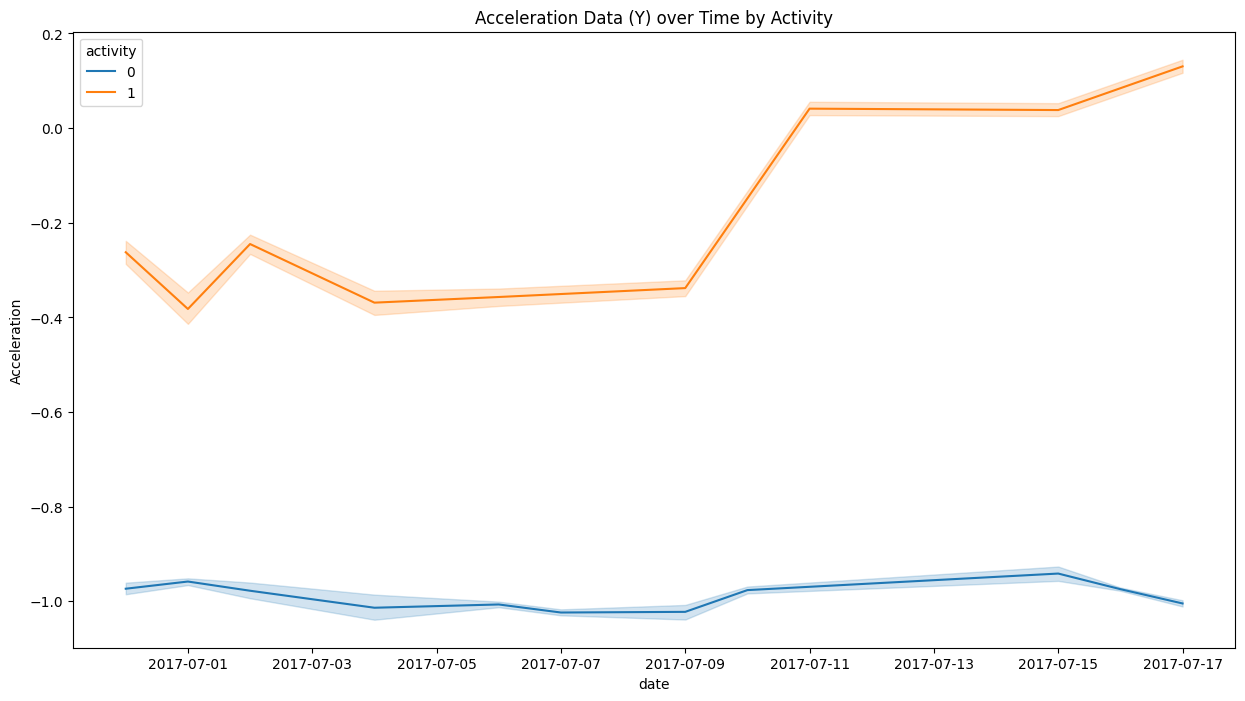

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='date', y='acceleration_y', hue='activity', data=df, linestyle='-')
plt.ylabel('Acceleration')
plt.title('Acceleration Data (Y) over Time by Activity')
plt.show()


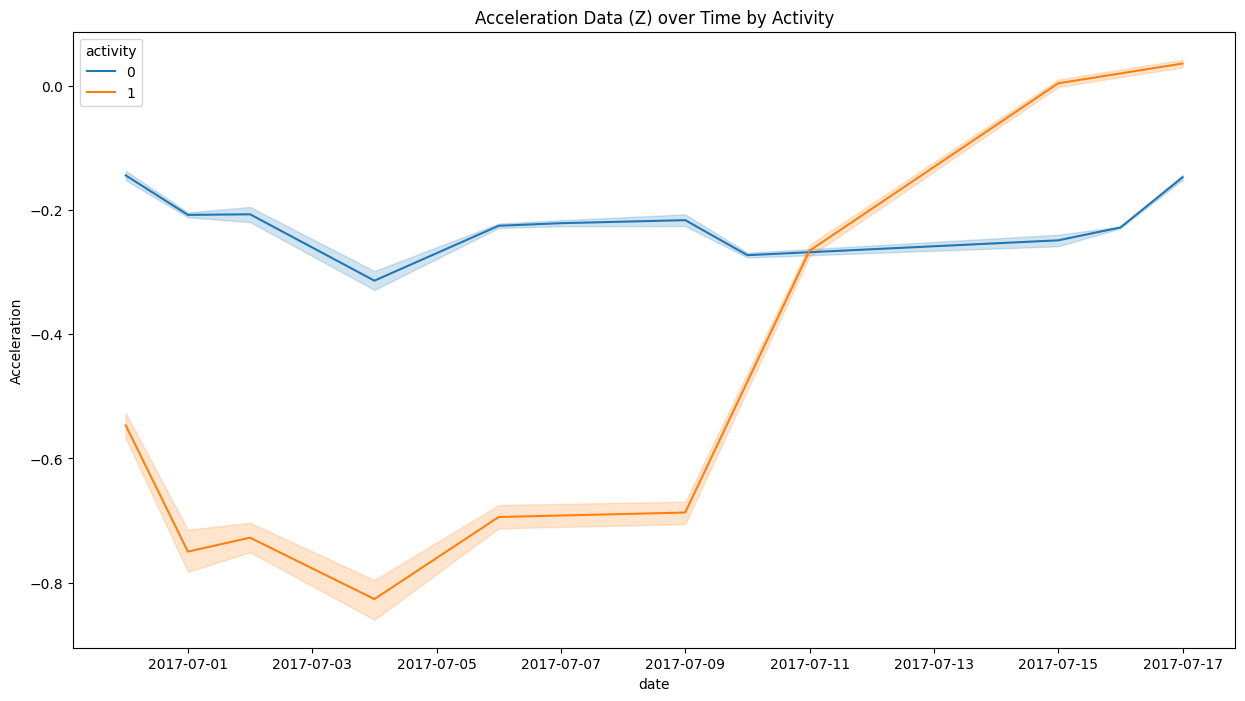

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='date', y='acceleration_z', hue='activity', data=df, linestyle='-')
plt.ylabel('Acceleration')
plt.title('Acceleration Data (Z) over Time by Activity')
plt.show()


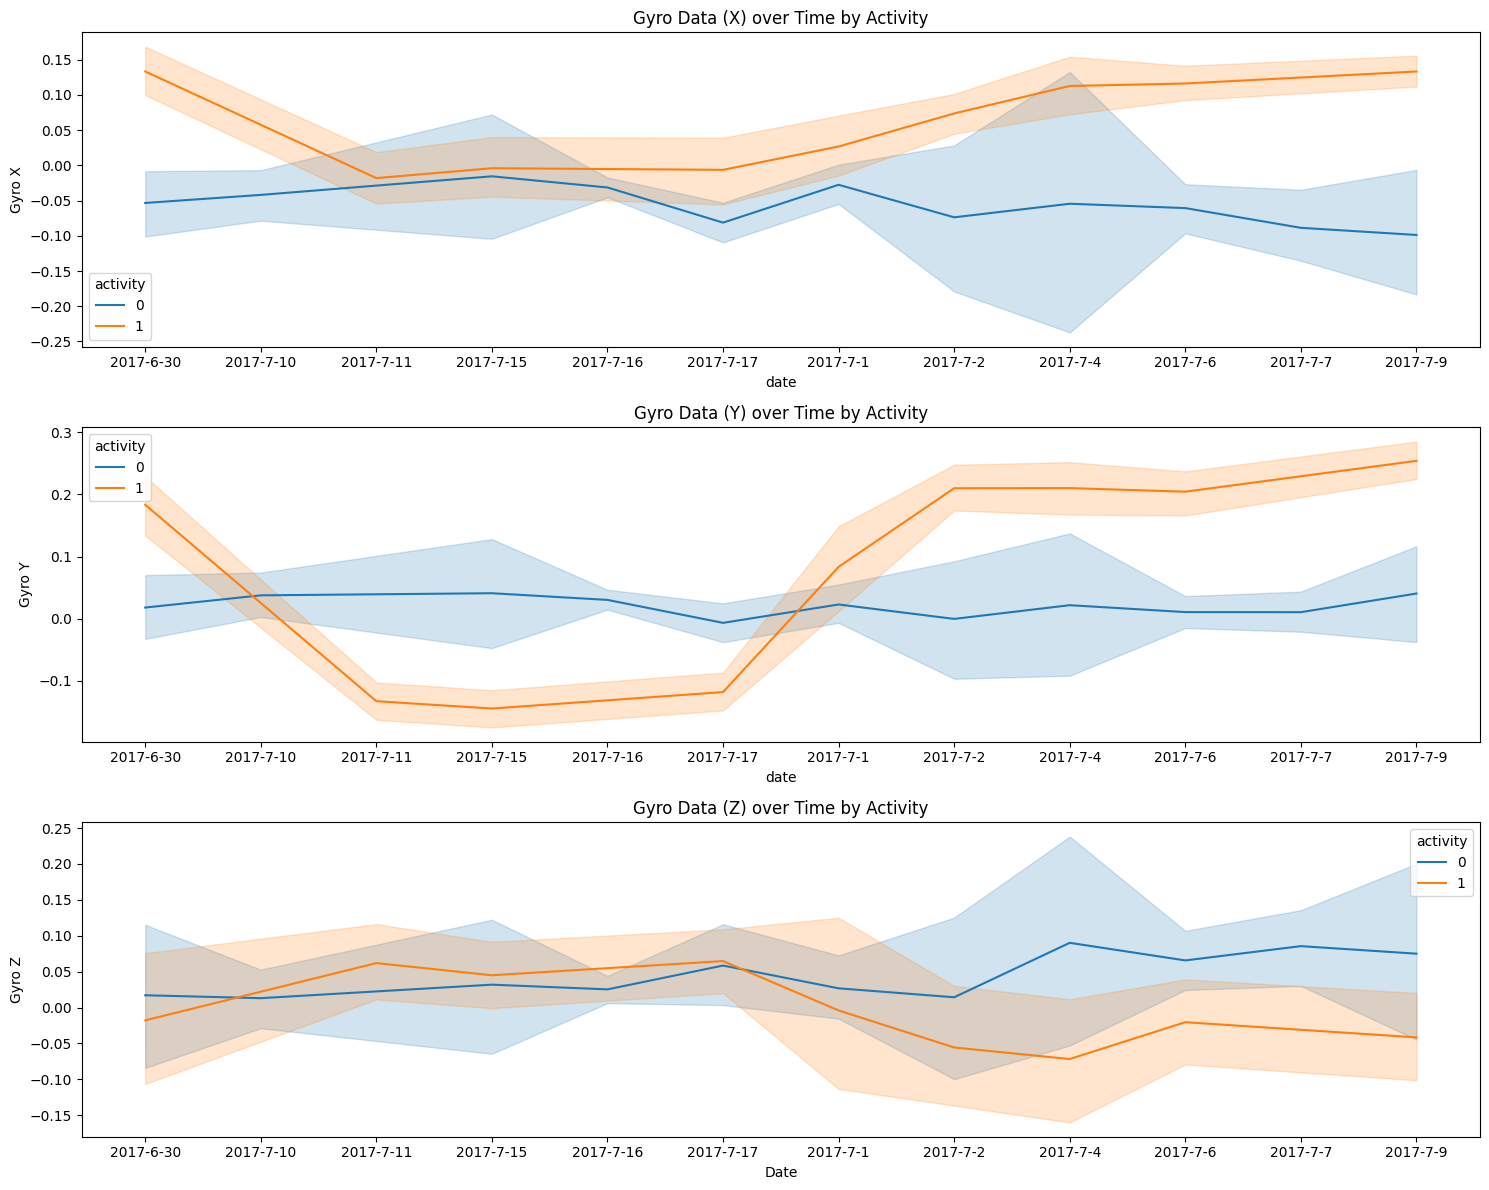

In [ ]:
plt.figure(figsize=(15, 12))

# Plot gyro_x
plt.subplot(3, 1, 1)
sns.lineplot(x='date', y='gyro_x', hue='activity', data=df, linestyle='-')
plt.ylabel('Gyro X')
plt.title('Gyro Data (X) over Time by Activity')

# Plot gyro_y
plt.subplot(3, 1, 2)
sns.lineplot(x='date', y='gyro_y', hue='activity', data=df, linestyle='-')
plt.ylabel('Gyro Y')
plt.title('Gyro Data (Y) over Time by Activity')

# Plot gyro_z
plt.subplot(3, 1, 3)
sns.lineplot(x='date', y='gyro_z', hue='activity', data=df, linestyle='-')
plt.ylabel('Gyro Z')
plt.title('Gyro Data (Z) over Time by Activity')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            88588 non-null  datetime64[ns]
 1   time            88588 non-null  object        
 2   username        88588 non-null  object        
 3   wrist           88588 non-null  int64         
 4   activity        88588 non-null  int64         
 5   acceleration_x  88588 non-null  float64       
 6   acceleration_y  88588 non-null  float64       
 7   acceleration_z  88588 non-null  float64       
 8   gyro_x          88588 non-null  float64       
 9   gyro_y          88588 non-null  float64       
 10  gyro_z          88588 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 7.4+ MB


##### LSTM models focus on numerical sequences for prediction tasks. Therefore, the model will take accelerometer and gyroscope readings as features because these contain the relevant data needed to understand the movement patterns. While the date and time columns can provide contextual information (such as the time of day), they typically aren't directly useful for predicting the activity state based on sensor readings. The LSTM model will look for patterns in the sequences of numerical data (like accelerometer values) rather than temporal or categorical context. Ware dropping these columns.


In [ ]:
df.drop(['date','time','username'],axis=1,inplace=True)
df.head(1)

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.265,-0.7814,-0.0076,-0.059,0.0325,-2.9296


**Features and Target values.**

In [ ]:
X=df.drop('activity',axis=1)
y=df['activity']

**Applying standard scalar for all features column.**

In [ ]:

scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
X.head(2)


,0,1,2,3,4,5,6
0,-1.045368,0.336683,-0.332316,0.629311,-0.050391,-0.003924,-1.541949
1,-1.045368,0.740133,-0.851562,0.163423,-0.143496,-0.013684,0.054624


**Task 2:Predicting model by using LSTM**

In [ ]:
def create_sequences(features, target, time_steps=30):
    X_seq, y_seq = [], []
    for i in range(len(features) - time_steps):
        X_seq.append(features[i:i + time_steps])
        y_seq.append(target.iloc[i + time_steps])
    return np.array(X_seq), np.array(y_seq)


time_steps=30
X_seq, y_seq = create_sequences(pd.DataFrame(X), y, time_steps)
print(X_seq.shape)
print(y_seq.shape)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


(88558, 30, 7)
(88558,)


**Define the Model Architecture**

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(25, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])







**Training the model**

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/5
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.9910 - loss: 0.0504 - val_accuracy: 0.9988 - val_loss: 0.0068
Epoch 2/5
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.9989 - loss: 0.0069 - val_accuracy: 0.9992 - val_loss: 0.0047
Epoch 3/5
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 73s 41ms/step - accuracy: 0.9992 - loss: 0.0062 - val_accuracy: 0.9992 - val_loss: 0.0042
Epoch 4/5
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.9990 - loss: 0.0057 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 5/5
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.9993 - loss: 0.0050 - val_accuracy: 0.9993 - val_loss: 0.0037
554/554 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9992 - loss: 0.0038
Test Loss: 0.0038
Test Accuracy: 0.9992


In [ ]:
predictions = model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)
print(predicted_classes[:10])






554/554 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

554/554 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9992 - loss: 0.0038
Test Loss: 0.0038
Test Accuracy: 0.9992


In [ ]:
print(classification_report(y_test, predicted_classes))

confusion_mtx = confusion_matrix(y_test, predicted_classes)
print(confusion_mtx)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8868
           1       1.00      1.00      1.00      8844

    accuracy                           1.00     17712
   macro avg       1.00      1.00      1.00     17712
weighted avg       1.00      1.00      1.00     17712

[[8860    8]
 [   6 8838]]


The LSTM model demonstrates excellent performance on the dataset, achieving high accuracy scores and minimal test loss. This indicates that the model effectively distinguishes between walking and running activities, making it a robust choice for this task. The strong results suggest that the LSTM architecture is well-suited to capturing the temporal dependencies in the accelerometer and gyroscope data, thereby enhancing its predictive capabilities for activity classification.

In [ ]:

model.save('lstm_model.h5')